<a href="https://colab.research.google.com/github/Vedikaaa-737/SKILL/blob/main/EXPERIMENTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#LOAD AND MERGE DATASET

import pandas as pd
import numpy as np

# Download dataset from UCI ML Repo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_red = pd.read_csv(url, sep=';')

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_white = pd.read_csv(url, sep=';')

# Add a 'type' column (red=0, white=1)
df_red['type'] = 0
df_white['type'] = 1

# Merge datasets
df = pd.concat([df_red, df_white], ignore_index=True)
print("Merged dataset shape:", df.shape)
print(df.head())

Merged dataset shape: (6497, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0

In [3]:
#DATA PREPROCESSING - CLEANING DATASET

# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing values (if any)
df_cleaned = df.fillna(df.mean())

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())
print("Shape after cleaning:", df_cleaned.shape)

Missing values before cleaning:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Missing values after cleaning:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64
Shape after cleaning: (5320, 13)


In [4]:
#DATA PREPROCESSING - ENCODING TECHNIQUES

# Label Encoding (for 'type' column)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['type_encoded'] = le.fit_transform(df_cleaned['type'])

# One-Hot Encoding (if needed for categorical variables)
# Example: Binning 'quality' into categories
df_cleaned['quality_category'] = pd.cut(df_cleaned['quality'], bins=[0, 4, 6, 10], labels=['Low', 'Medium', 'High'])
ohe = pd.get_dummies(df_cleaned['quality_category'], prefix='quality')
df_cleaned = pd.concat([df_cleaned, ohe], axis=1)

print("\nAfter encoding:")
print(df_cleaned[['type', 'type_encoded', 'quality', 'quality_category']].head())


After encoding:
   type  type_encoded  quality quality_category
0     0             0        5           Medium
1     0             0        5           Medium
2     0             0        5           Medium
3     0             0        6           Medium
5     0             0        5           Medium


In [5]:
#DATA PREPROCESSING - NORMALIZATION

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
df_minmax = df_cleaned.copy()
df_minmax[df_red.columns[:-1]] = minmax_scaler.fit_transform(df_minmax[df_red.columns[:-1]])

# Standardization (Z-score)
std_scaler = StandardScaler()
df_standard = df_cleaned.copy()
df_standard[df_red.columns[:-1]] = std_scaler.fit_transform(df_standard[df_red.columns[:-1]])

print("\nMin-Max Normalized data (first 5 rows):")
print(df_minmax.head())
print("\nStandardized data (first 5 rows):")
print(df_standard.head())


Min-Max Normalized data (first 5 rows):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
5       0.297521          0.386667     0.000000        0.018405   0.109635   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
5             0.041667              0.078341  0.206092  0.612403   0.191011   

    alcohol   q

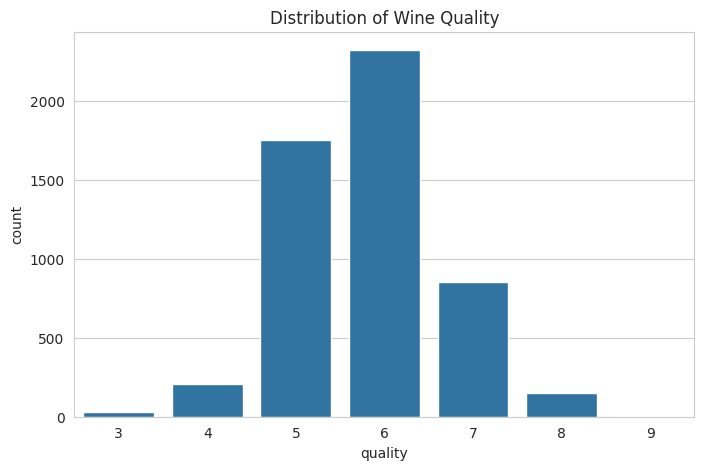

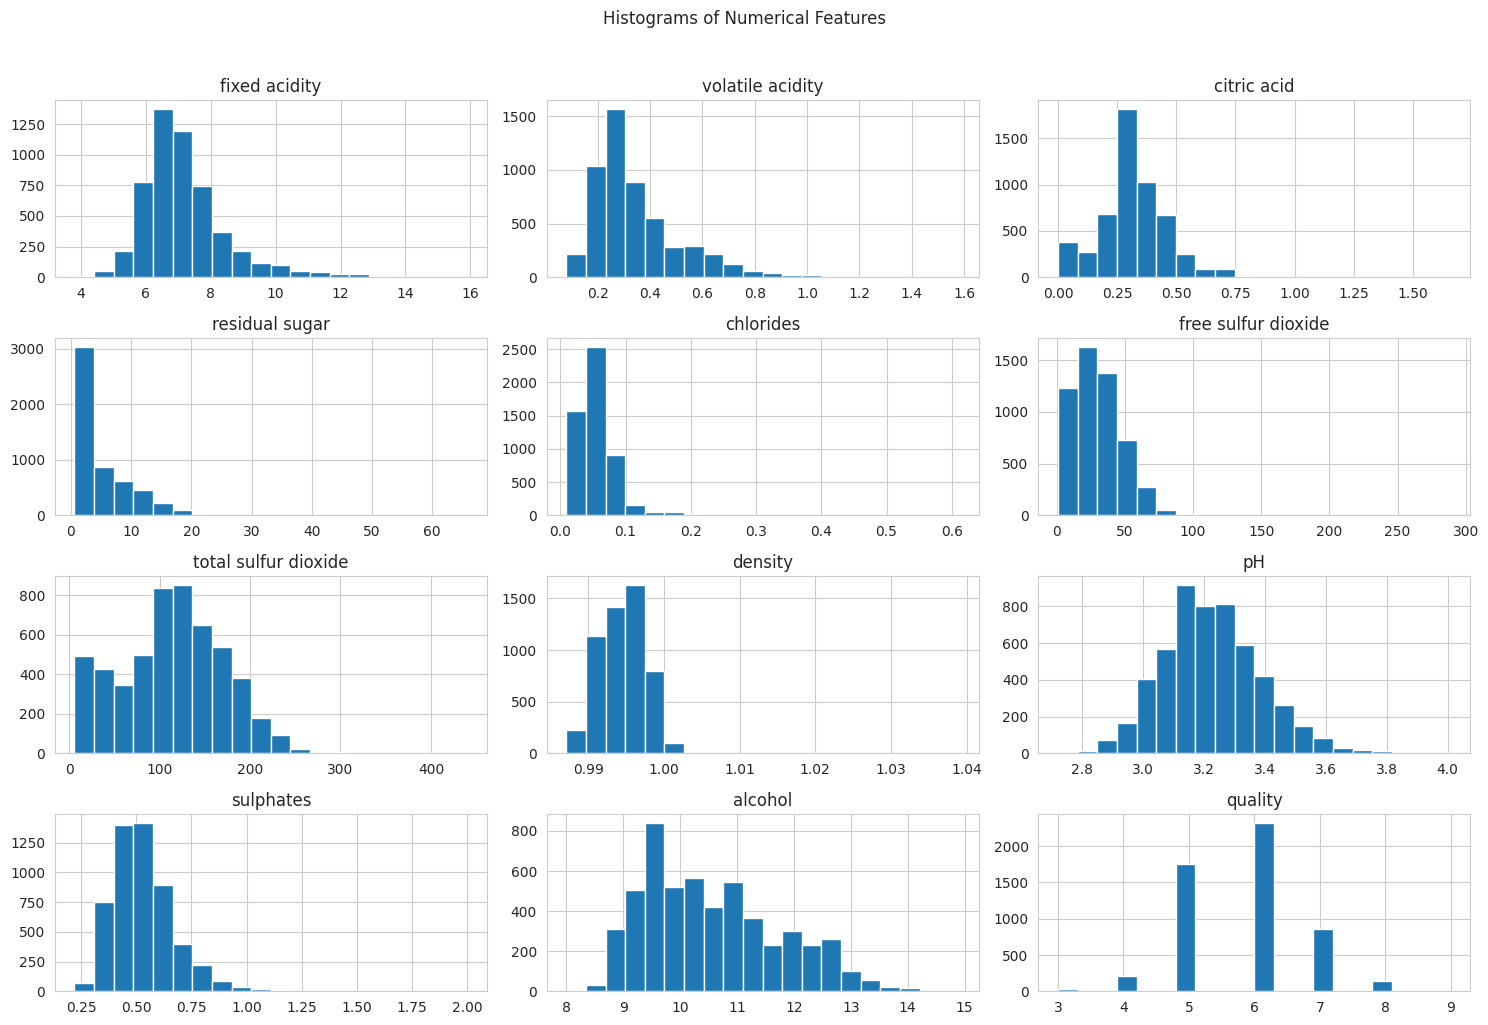

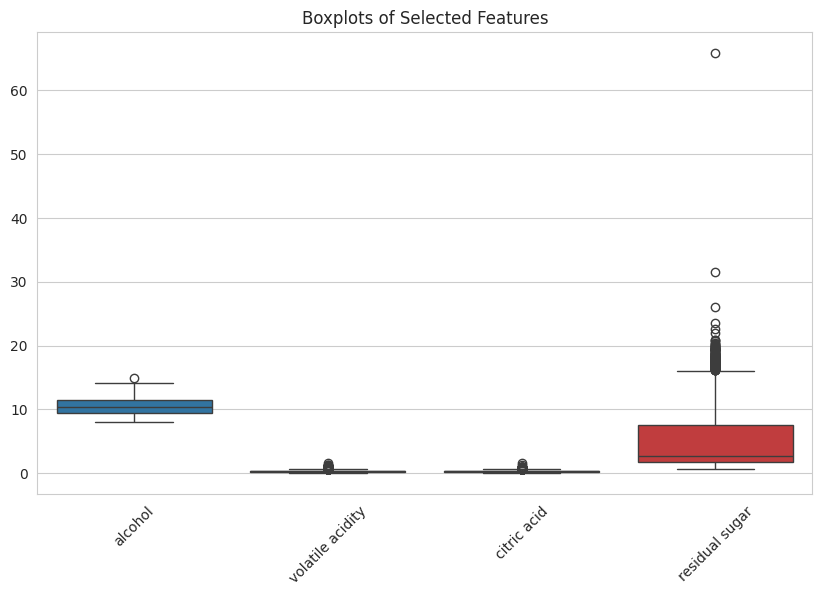

In [6]:
#DATA VISUALIZATION - UNIVARIATE ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# 1. Distribution of Target ('quality')
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='quality')
plt.title("Distribution of Wine Quality")
plt.show()

# 2. Histograms for all features
df_cleaned.drop(columns=['type', 'type_encoded', 'quality_category']).hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

# 3. Boxplots for key features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['alcohol', 'volatile acidity', 'citric acid', 'residual sugar']])
plt.title("Boxplots of Selected Features")
plt.xticks(rotation=45)
plt.show()

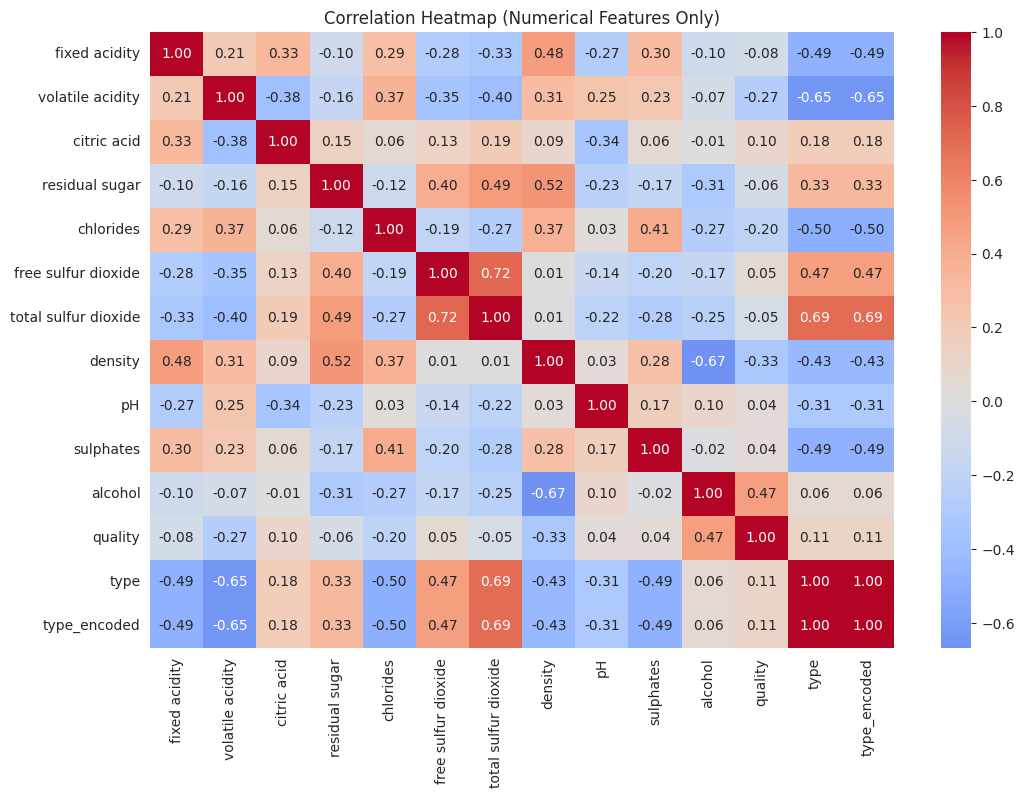

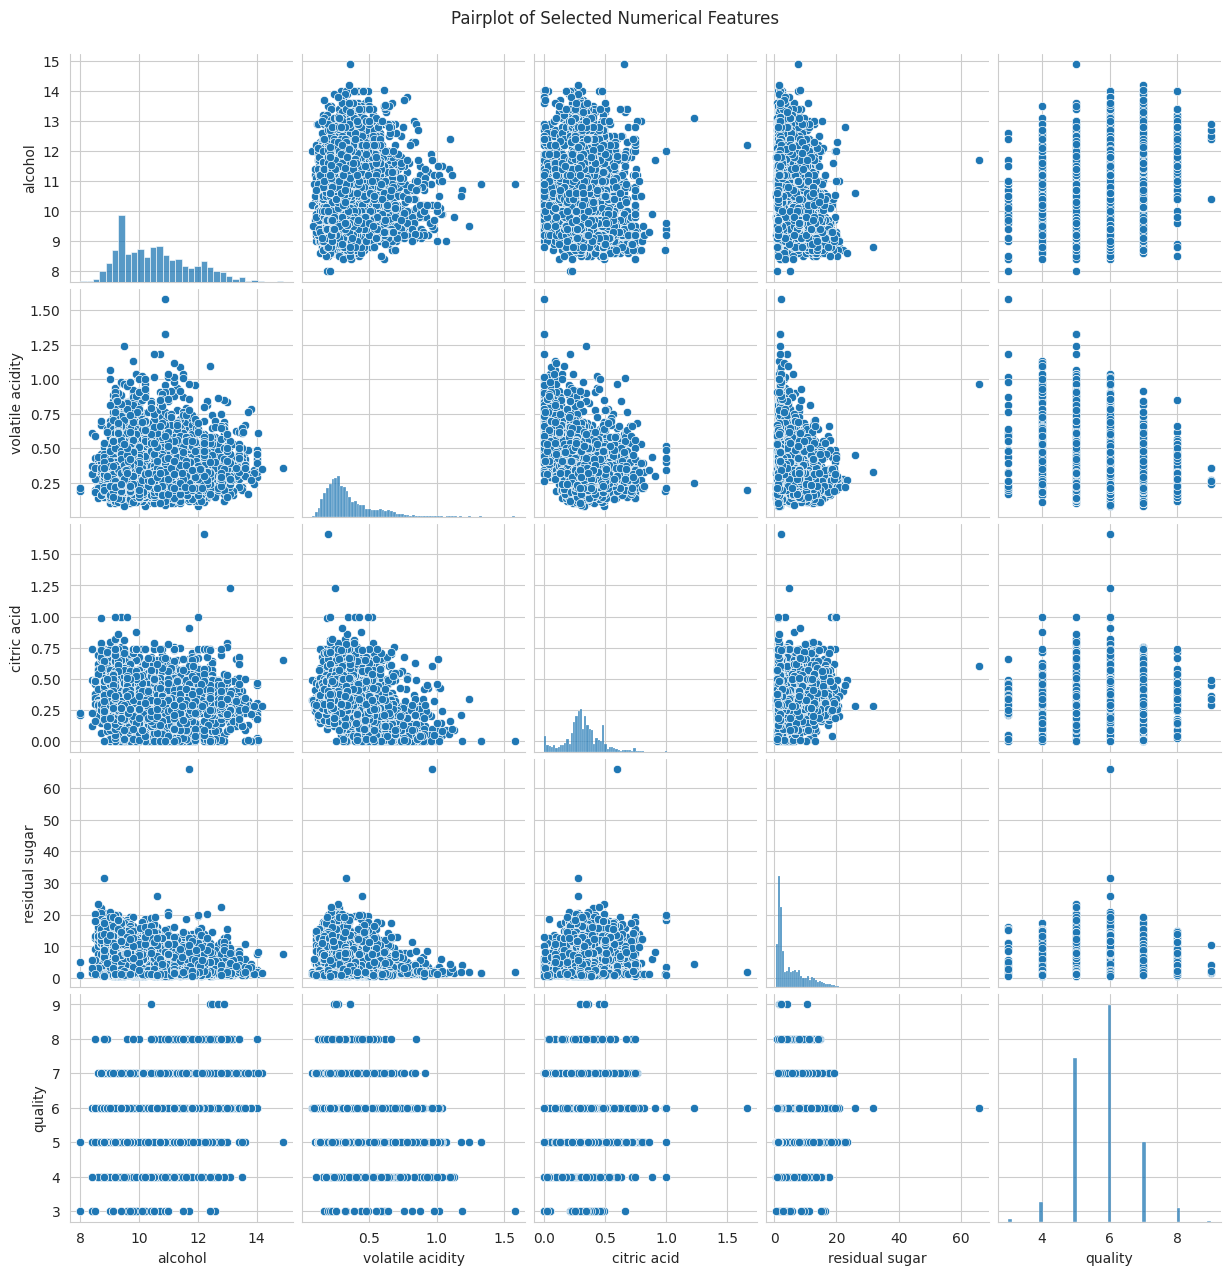

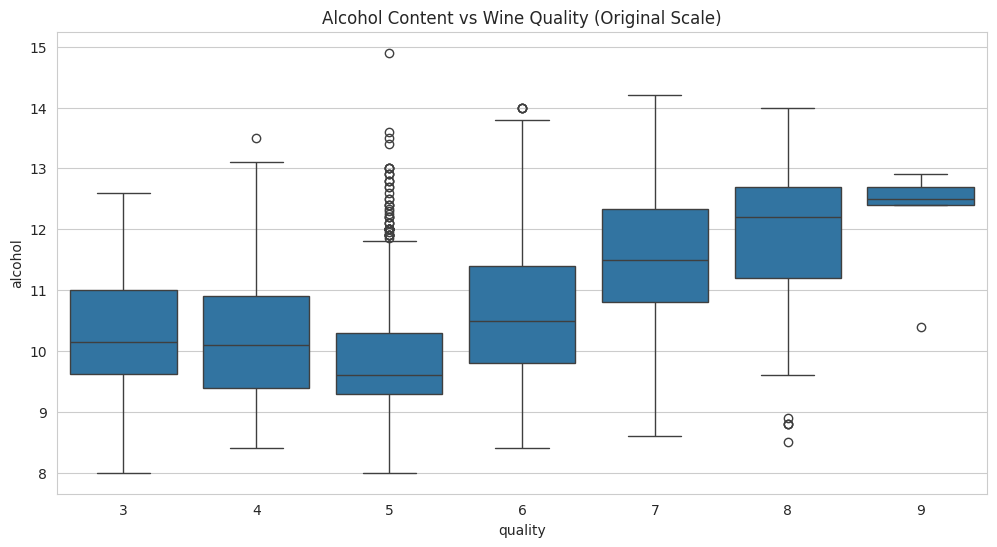

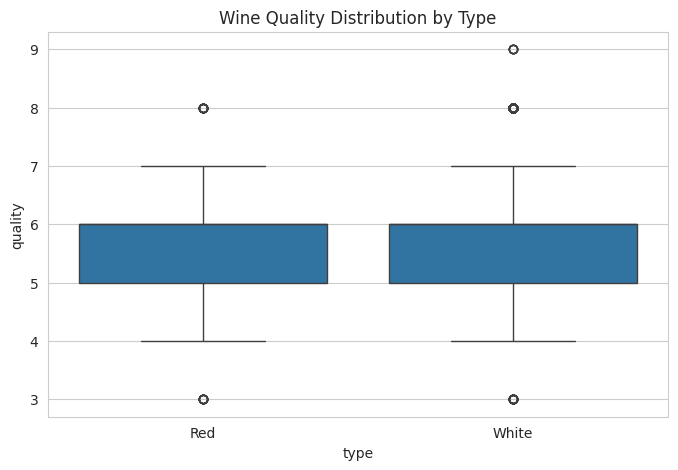

In [8]:
#DATA VISUALIZATION - MULTIVARIATE ANALYSIS

# Experiment 6: Data Visualization (Multivariate Analysis)
# Use only numerical columns for correlation
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df_cleaned[numerical_cols]

# 1. Correlation Heatmap (fixed)
plt.figure(figsize=(12, 8))
corr_matrix = df_numerical.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

# 2. Scatterplot Matrix (for 4 key features)
sns.pairplot(df_numerical[['alcohol', 'volatile acidity', 'citric acid', 'residual sugar', 'quality']])
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

# 3. Feature vs Target Boxplots (using original quality)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numerical, x='quality', y='alcohol')
plt.title("Alcohol Content vs Wine Quality (Original Scale)")
plt.show()

# 4. Type vs Quality Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='type', y='quality')
plt.xticks([0, 1], ['Red', 'White'])
plt.title("Wine Quality Distribution by Type")
plt.show()

In [10]:
#FILTER METHODS(FEATURE SELECTION)

from sklearn.feature_selection import SelectKBest, f_classif, chi2

X = df_cleaned.drop(['quality', 'type', 'quality_category', 'type_encoded'] + list(ohe.columns), axis=1)
y = df_cleaned['quality']

# 1. ANOVA F-test
selector_anova = SelectKBest(f_classif, k=5)
X_anova = selector_anova.fit_transform(X, y)
print("\nTop 5 features (ANOVA F-test):")
print(X.columns[selector_anova.get_support()])

# 2. Chi-squared (for categorical target, requires non-negative data)
X_non_neg = X - X.min()
selector_chi2 = SelectKBest(chi2, k=5)
X_chi2 = selector_chi2.fit_transform(X_non_neg, y)
print("\nTop 5 features (Chi-squared):")
print(X.columns[selector_chi2.get_support()])


Top 5 features (ANOVA F-test):
Index(['volatile acidity', 'chlorides', 'free sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')

Top 5 features (Chi-squared):
Index(['volatile acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')


In [11]:
#MORE FILTER METHODS

from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

# 1. Variance Threshold
selector_var = VarianceThreshold(threshold=0.1)
X_var = selector_var.fit_transform(X)
print("\nFeatures selected (Variance Threshold):")
print(X.columns[selector_var.get_support()])

# 2. Mutual Information
selector_mi = SelectKBest(mutual_info_classif, k=5)
X_mi = selector_mi.fit_transform(X, y)
print("\nTop 5 features (Mutual Information):")
print(X.columns[selector_mi.get_support()])


Features selected (Variance Threshold):
Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')

Top 5 features (Mutual Information):
Index(['volatile acidity', 'chlorides', 'free sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')


In [12]:
#WRAPPER METHODS (FEATURE SELECTION)

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# 1. Recursive Feature Elimination (RFE)
rfe = RFE(RandomForestClassifier(), n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)
print("\nTop 5 features (RFE with Random Forest):")
print(X.columns[rfe.get_support()])

# 2. Sequential Feature Selection (requires mlxtend)
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(RandomForestClassifier(),
          k_features=5,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=2)
sfs.fit(X, y)
print("\nTop 5 features (Sequential Forward Selection):")
print(list(sfs.k_feature_names_))


Top 5 features (RFE with Random Forest):
Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')

Top 5 features (Sequential Forward Selection):
['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']


In [13]:
#MORE WRAPPER METHODS

# 1. Backward Elimination
sbs = SFS(RandomForestClassifier(),
          k_features=5,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=2)
sbs.fit(X, y)
print("\nTop 5 features (Sequential Backward Selection):")
print(list(sbs.k_feature_names_))

# 2. RFE with Logistic Regression
rfe_lr = RFE(LogisticRegression(max_iter=1000), n_features_to_select=5)
X_rfe_lr = rfe_lr.fit_transform(X, y)
print("\nTop 5 features (RFE with Logistic Regression):")
print(X.columns[rfe_lr.get_support()])


Top 5 features (Sequential Backward Selection):
['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Top 5 features (RFE with Logistic Regression):
Index(['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol'], dtype='object')


In [14]:
#EMBEDDED METHODS

from sklearn.feature_selection import SelectFromModel

# 1. Feature Importance (Random Forest)
rf = RandomForestClassifier()
rf.fit(X, y)
importance = rf.feature_importances_
selected_features_rf = X.columns[importance > np.mean(importance)]
print("\nSelected features (Random Forest Importance):")
print(selected_features_rf)

# 2. L1-based (Lasso)
from sklearn.linear_model import LassoCV
lasso = SelectFromModel(LassoCV(cv=5))
lasso.fit(X, y)
print("\nSelected features (LassoCV):")
print(X.columns[lasso.get_support()])


Selected features (Random Forest Importance):
Index(['volatile acidity', 'total sulfur dioxide', 'density', 'alcohol'], dtype='object')

Selected features (LassoCV):
Index(['fixed acidity', 'volatile acidity', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')


In [15]:
#Supervised ML Classifiers

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Prepare data (using cleaned/normalized data from Experiment 4)
X = df_standard.drop(['quality', 'type', 'quality_category', 'type_encoded'] + list(ohe.columns), axis=1)
y = df_cleaned['quality']  # Using original quality values (classification)

# Binarize target for simpler classification (good wine: quality >= 6)
y_bin = (y >= 6).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='rbf'),
    "k-NN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))

# Compare results
print("\nModel Accuracy Comparison:")
pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy']).sort_values(by='Accuracy', ascending=False)


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       610
           1       0.79      0.84      0.81       986

    accuracy                           0.76      1596
   macro avg       0.75      0.74      0.74      1596
weighted avg       0.76      0.76      0.76      1596


SVM Performance:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       610
           1       0.78      0.84      0.81       986

    accuracy                           0.75      1596
   macro avg       0.74      0.73      0.73      1596
weighted avg       0.75      0.75      0.75      1596


k-NN Performance:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       610
           1       0.76      0.83      0.79       986

    accuracy                           0.73      1596
   macro avg       0.71      0.70      0.70      1596
weighted 

,Accuracy
Random Forest,0.762531
Gradient Boosting,0.757519
SVM,0.751880
k-NN,0.728697
Naive Bayes,0.696742
